## 46 - Modeling: Extra Trees Improved Model

> Notebook to improve the model that we selected: Extra Trees


In [ ]:
# import needed packages
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("dark")

In [ ]:
# read the data
full_data = pd.read_csv('data/cumulative_data_fe.csv')
train_data = pd.read_csv('data/train_data_fe.csv')
test_data = pd.read_csv('data/test_data_fe.csv')

# drop columns
y_train_data = pd.DataFrame(train_data['stone_soil_enc'])
x_train_data = train_data.drop(['id', 'img_id', 'stone_soil', 'stone_soil_enc'], axis = 1)

# drop columns
y_test_data = pd.DataFrame(test_data['stone_soil_enc'])
x_test_data = test_data.drop(['id', 'img_id', 'stone_soil', 'stone_soil_enc'], axis = 1)

In [ ]:
# define a function for scoring
def pred_metrics(real, pred) -> None:
    print("Accuracy:\t{}".format(metrics.accuracy_score(real, pred)))
    print("Precision:\t{}".format(metrics.precision_score(real, pred)))
    print("Recall:\t\t{}".format(metrics.recall_score(real, pred)))
    print("F1:\t\t{}".format(metrics.f1_score(real, pred)))

In [ ]:
# initialize ET classifier instance and train
et = ExtraTreesClassifier(random_state=10)
et.fit(x_train_data, y_train_data.values.ravel())

ExtraTreesClassifier(random_state=10)

In [ ]:
# calculate metrics of training
y_train_pred = et.predict(x_train_data)
pred_metrics(y_train_data, y_train_pred)

Accuracy:	0.9982032119573859
Precision:	1.0
Recall:		0.9731846226862838
F1:		0.9864101022248948


In [ ]:
# calculate metrics of testing
y_test_pred = et.predict(x_test_data)
pred_metrics(y_test_data, y_test_pred)

Accuracy:	0.9620277318407328
Precision:	0.8218997361477572
Recall:		0.5741935483870968
F1:		0.6760716223548563


In [ ]:
# cross validation
cross_val_score(et, x_train_data, y_train_data.values.ravel(), cv= 10, scoring = 'f1')

array([0.69489051, 0.7       , 0.69121813, 0.6751773 , 0.71966527,
       0.68258427, 0.67821068, 0.68097282, 0.63976945, 0.71468144])

In [ ]:
# enable bootstrap
et = ExtraTreesClassifier(oob_score=True, random_state=10, bootstrap=True)
et.fit(x_train_data, y_train_data.values.ravel())

ExtraTreesClassifier(bootstrap=True, oob_score=True, random_state=10)

In [ ]:
# calculate metrics of training
y_train_pred = et.predict(x_train_data)
pred_metrics(y_train_data, y_train_pred)

Accuracy:	0.9981714103991095
Precision:	0.9995125517913722
Recall:		0.9731846226862838
F1:		0.9861728988818084


In [ ]:
# calculate metrics of testing
y_test_pred = et.predict(x_test_data)
pred_metrics(y_test_data, y_test_pred)

Accuracy:	0.9612008650298944
Precision:	0.8397711015736766
Recall:		0.5410138248847927
F1:		0.6580717488789238


<AxesSubplot:>

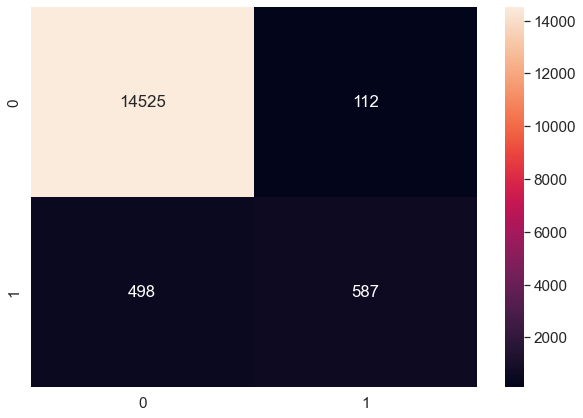

In [ ]:
# calculate the confusion matrix with test data
cm = confusion_matrix(y_test_data, y_test_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt = "g")

Observations from the Confusion Matrix: The biggest bucket that we have are true negatives - where the model is predicting 0 and the true value is 0. The second bucket is true positives. However, there are still 498 instances where the model predicted 0 when the actual value was 1, which is a false negative. High false negatives will impact the recall value and drive it to a lower percentage. On the other hand, the false positives (112) drive the precisions so since that number is lower, our precision will be higher than our recall, which we see.

In [ ]:
# print a classification report with test data which splits up 0 and 1 for the metrics
# and provides weighted averages
print(classification_report(y_test_data, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14637
           1       0.84      0.54      0.66      1085

    accuracy                           0.96     15722
   macro avg       0.90      0.77      0.82     15722
weighted avg       0.96      0.96      0.96     15722



### Insights

For the chosen model, we investigated the variable importance.

In [ ]:
feature = pd.DataFrame({"feature":list(x_train_data.columns), "importance": list(et.feature_importances_)})
feature = feature.sort_values("importance", ascending = False).reset_index(drop = True)
feature

,feature,importance
0,transparency,0.203708
1,thick_trans_prod,0.083876
2,fiber_length,0.041260
3,fiber_width,0.039791
4,rnd_ell_prod,0.029295
5,solidity,0.023504
6,concavity,0.022974
7,extent,0.022786
8,angularity,0.021970
9,roundness,0.021747


In [ ]:
feature_list = feature.loc[:9,["feature", "importance"]]

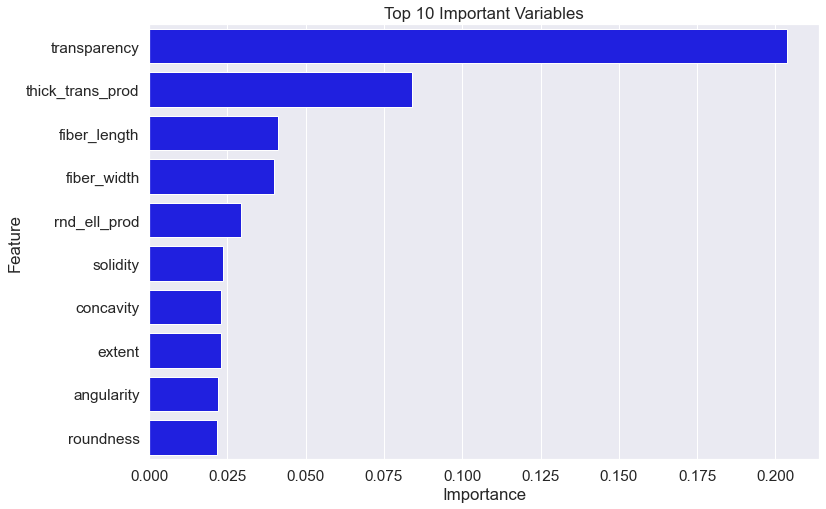

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(data = feature_list, x = "importance", y = "feature", color = "blue")
plt.title("Top 10 Important Variables")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Commentary
This section assesses the reasonableness of the top ten important variables in our model. Overall it appears that the variables measured as important to the model make sense. There are logical reasons backed up by visualizations in our exploratory data analysis that these features would do a good job distinguishing between soil and stone.

- **Transparency** is the mean light intensity of the longest vertical line analyzed. In our exploratory data analysis, the distribution of transparency was the more different between soil and stone than for any other variable. It therefore makes sense that it would be an important variable in distinguishing soil from stone.

- **Thickness Transparency Interaction** (thick_trans_prod) is an attempted encoding of the interaction we discovered between thickness and transparency during our exploratory data analysis. It appeared that, as particles became thicker, the difference in transparency increased.

- **Fiber Length** and **Fiber Width** are measure of linear dimension. By eye, it was hard to see a difference in the stone/soil distribution of these variables. My investigation would be required to assess whether this is a reasonable important variable.

- **Roundness Ellipticity Interaction** (rnd_ell_prod) is another attempted encoding of an interaction. This one is between roundness and ellipticity. In our exploratory data analysis, it appeared that soil particals had a roundness to ellipticity ratio that was either very high or very low. Stone particles tended to be somewhere in the middle.

- **Solidity** is a measure of surface roughness. Higher values describe a smooth surface. Logically, small stone shards might be rougher than soft soil.

- **Concavity** is another measure of surface roughness. Higher values are rough and spikey. It makes sense that the stone particles might be spikey and sharp compared to soil.

- **Extent** = Area / (FLength x FWidth). Value of 1 describes the degree to which the actual area takes up maximum possible area based on product of the two largest perpendicular dimensions. Here, again our exploratory data analysis showed that soil had a larger extent than stone.

- **Angularity** is a measure of protrusions and sharp angles such as abrasives. Although the shape of their distributions was similar, soil particles had a higher density at very low angularity.

- **Roundness** is another shape indicator. Higher values are assigned to circle-like objects. In this case, soil is rounder.

### Revision

1. To balance the volume difference between stone and soil, the train and test data is recreated.

In [ ]:
# reset new train and test sets with stone and soil mixed different sizes
full_data = pd.read_csv('data/cumulative_data_fe.csv')
new_features = list(feature.loc[:20,"feature"])
# drop columns
stone_data =full_data[full_data["stone_soil_enc"] == 1] 
y = stone_data['stone_soil_enc']
x = stone_data.drop(['id', 'img_id', 'stone_soil', 'stone_soil_enc'], axis = 1)
x = x[new_features]
x_train_stone, x_test_stone, y_train_stone, y_test_stone = train_test_split(x, y, random_state = 420, train_size = 0.7)

soil_data =full_data[full_data["stone_soil_enc"] == 0] 
y = soil_data['stone_soil_enc']
x = soil_data.drop(['id', 'img_id', 'stone_soil', 'stone_soil_enc'], axis = 1)
x = x[new_features]
x_train_soil, x_test_soil, y_train_soil, y_test_soil = train_test_split(x, y, random_state = 420, train_size = 0.8)

x_train = pd.concat([x_train_stone, x_train_soil], axis = 0)
x_test = pd.concat([x_test_stone, x_test_soil], axis = 0)
y_train = pd.concat([y_train_stone, y_train_soil], axis = 0)
y_test = pd.concat([y_test_stone, y_test_soil], axis = 0)

In [ ]:
# train new model
clf2 = ExtraTreesClassifier(random_state=10)
clf2.fit(x_train, y_train)

ExtraTreesClassifier(random_state=10)

In [ ]:
# calculate metrics of training
y_train_pred = clf2.predict(x_train)
pred_metrics(y_train, y_train_pred)

Accuracy:	0.9983963822383297
Precision:	0.9997230684021047
Recall:		0.9733081693178754
F1:		0.9863387978142076


In [ ]:
# cross validation
cross_val_score(clf2, x_train, y_train, cv= 10, scoring = 'f1')

array([0.65472313, 0.67540984, 0.66225166, 0.67094703, 0.67868852,
       0.70846395, 0.6720517 , 0.70833333, 0.65912763, 0.68599034])

In [ ]:
# calculate metrics of testing
y_test_pred = clf2.predict(x_test)
pred_metrics(y_test, y_test_pred)

Accuracy:	0.9530548206484957
Precision:	0.9049951028403526
Recall:		0.5811320754716981
F1:		0.707774798927614


In [ ]:
# grid search
param_grid={
        'n_estimators': [*range(10,200,10)],
        'max_depth':[*range(10,200,10)],
        'min_samples_leaf': [*range(2,16,1)],
        'min_samples_split': [*range(2,16,1)],
}
for p in ['n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split']:
    gs = GridSearchCV(
        ExtraTreesClassifier(),
        {p: param_grid[p]},
        scoring='f1_macro',
        cv=5,
        n_jobs=-1
    )
    gs.fit(x_train, y_train.values.ravel())
    print(p, end=', ')
    print(gs.best_params_, end=', ')
    print(gs.best_score_)

n_estimators, {'n_estimators': 150}, 0.8329905534078575
max_depth, {'max_depth': 40}, 0.8327013924076404
min_samples_leaf, {'min_samples_leaf': 2}, 0.8263704052745549
min_samples_split, {'min_samples_split': 5}, 0.83229878962636


In [ ]:
# grid search 2
gs = GridSearchCV(
        ExtraTreesClassifier(n_estimators=150),
        param_grid={
            'max_depth':[*range(20,80,10)],
            'min_samples_split': [*range(2,10,1)],
        },
        scoring='f1_macro',
        cv=5,
        n_jobs=-1
    )
gs.fit(x_train, y_train.values.ravel())
print(gs.best_params_, end=', ')
print(gs.best_score_)

{'max_depth': 30, 'min_samples_split': 2}, 0.8340146074686021


In [ ]:
# train new model
clf3 = ExtraTreesClassifier(n_estimators=150, max_depth=30, min_samples_split=2)
clf3.fit(x_train, y_train)

# calculate metrics of training
y_train_pred = clf3.predict(x_train)
pred_metrics(y_train, y_train_pred)

Accuracy:	0.9979313330874453
Precision:	1.0
Recall:		0.9652197357778377
F1:		0.9823020990533682


In [ ]:
# calculate metrics of testing
y_test_pred = clf3.predict(x_test)
pred_metrics(y_test, y_test_pred)

Accuracy:	0.9543468898049591
Precision:	0.9124513618677043
Recall:		0.589937106918239
F1:		0.7165775401069518


#### Confusion Matrix

<AxesSubplot:>

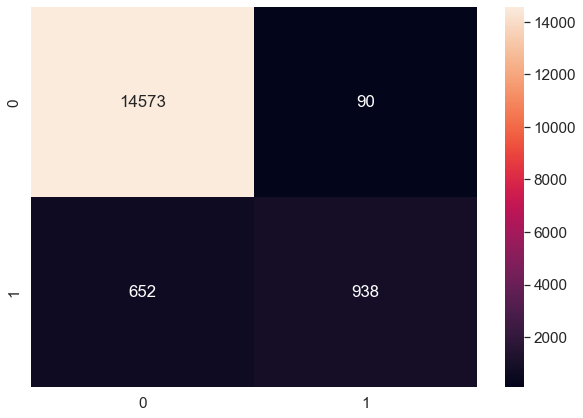

In [ ]:
cm = confusion_matrix(y_test, y_test_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt = "g")

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14663
           1       0.91      0.59      0.72      1590

    accuracy                           0.95     16253
   macro avg       0.93      0.79      0.85     16253
weighted avg       0.95      0.95      0.95     16253

